In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#import train_test_spilt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,roc_auc_score

In [53]:
df=pd.read_excel('heart_disease.xlsx')

In [54]:
df

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  False      2.3  downsloping       fixed defect    0  
1       132  False      0.0         flat       fixed defect    0  
2       148  False      0.4         flat       fixed defect    0  
3       190  False      0.0         flat       fixed defect    0  
4       126   True      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  False      1.5    upsloping             normal    4  
904     120   True      3.0         flat             normal    4  
905     123   True      2.5  downsloping       fixed defect    4  
906     105   TURE      NaN  downsloping  reversable defect    4  
907     182  FALSE      NaN         flat  reversable defect    4  

[908 rows x 13 columns]

In [55]:
df.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [57]:
df.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [58]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [59]:
pd.get_dummies(df)

age  trestbps  chol    fbs  thalch  oldpeak  num  sex_Female  sex_Male  \
0     63       145   233   True     150      2.3    0       False      True   
1     41       135   203  False     132      0.0    0       False      True   
2     57       140   192  False     148      0.4    0       False      True   
3     52       118   186  False     190      0.0    0       False      True   
4     57       110   201  False     126      1.5    0       False      True   
..   ...       ...   ...    ...     ...      ...  ...         ...       ...   
903   53       125     0  False     120      1.5    4       False      True   
904   62       166   170  False     120      3.0    4       False      True   
905   56       170     0  False     123      2.5    4       False      True   
906   56       144   208   True     105      NaN    4       False      True   
907   57       142   277   True     182      NaN    4       False      True   

     cp_asymptomatic  ...  exang_False  exang_True  exang_FALSE  exang_TURE  \
0              False  ...         True       False        False       False   
1              False  ...         True       False        False       False   
2               True  ...         True       False        False       False   
3              False  ...         True       False        False       False   
4               True  ...        False        True        False       False   
..               ...  ...          ...         ...          ...         ...   
903             True  ...         True       False        False       False   
904             True  ...        False        True        False       False   
905            False  ...        False        True        False       False   
906            False  ...        False       False        False        True   
907             True  ...        False       False         True       False   

     slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
0                 True       False            False               True   
1                False        True            False               True   
2                False        True            False               True   
3                False        True            False               True   
4                False        True            False               True   
..                 ...         ...              ...                ...   
903              False       False             True              False   
904              False        True            False              False   
905               True       False            False               True   
906               True       False            False              False   
907              False        True            False              False   

     thal_normal  thal_reversable defect  
0          False                   False  
1          False                   False  
2          False                   False  
3          False                   False  
4          False                   False  
..           ...                     ...  
903         True                   False  
904         True                   False  
905        False                   False  
906        False                    True  
907        False                    True  

[908 rows x 26 columns]

In [60]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
data = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]
data

age  trestbps  chol  thalch  oldpeak
0     63       145   233     150      2.3
1     41       135   203     132      0.0
2     57       140   192     148      0.4
3     52       118   186     190      0.0
4     57       110   201     126      1.5
..   ...       ...   ...     ...      ...
903   53       125     0     120      1.5
904   62       166   170     120      3.0
905   56       170     0     123      2.5
906   56       144   208     105      NaN
907   57       142   277     182      NaN

[908 rows x 5 columns]

In [82]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [122]:
x=data
y=df['num']

In [123]:
x.isnull().sum()

age          0
trestbps     0
chol         0
thalch       0
oldpeak     62
dtype: int64

In [124]:
df.oldpeak.skew()

np.float64(1.021709071879743)

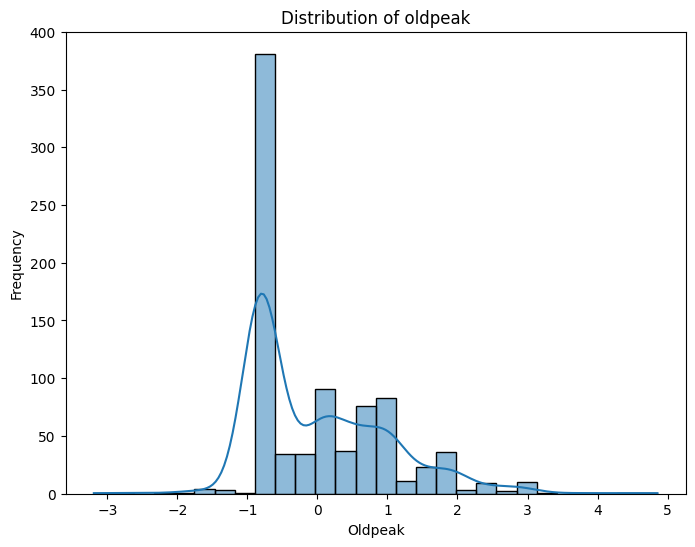

In [125]:
plt.figure(figsize=(8, 6))
sns.histplot(df['oldpeak'].dropna(), kde=True)
plt.title('Distribution of oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()


In [131]:
x.isnull().sum()

age          0
trestbps     0
chol         0
thalch       0
oldpeak     62
dtype: int64

In [132]:
data.corr()

age  trestbps      chol    thalch   oldpeak
age       1.000000  0.253999 -0.099967 -0.328088  0.242662
trestbps  0.253999  1.000000  0.117488 -0.133360  0.167131
chol     -0.099967  0.117488  1.000000  0.197907  0.029898
thalch   -0.328088 -0.133360  0.197907  1.000000 -0.139598
oldpeak   0.242662  0.167131  0.029898 -0.139598  1.000000

<Axes: >

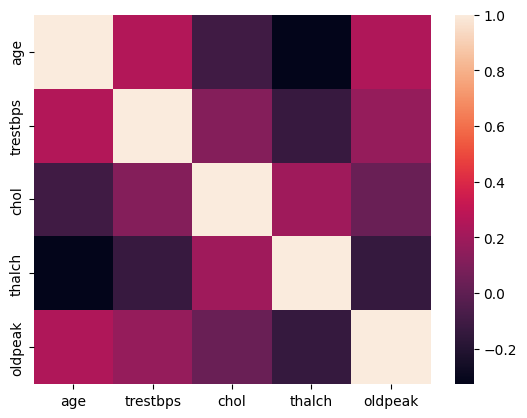

In [133]:
sns.heatmap(data.corr())

In [147]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [148]:
model=DecisionTreeClassifier()

In [149]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [150]:
y_pred = model.predict(x_test)

In [151]:
cm = confusion_matrix(y_test,y_pred)

In [156]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# For multiclass targets, specify the average method
recall = recall_score(y_test, y_pred, average="macro")  # Choose average method
f1 = f1_score(y_test, y_pred, average="macro")  # Choose average method

# Calculate ROC AUC for multiclass
roc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class="ovr")

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc)
print("Confusion Matrix: ",cm)

Accuracy: 0.45604395604395603
Recall: 0.31204760760279593
F1 Score: 0.30766179251810505
ROC AUC Score: 0.5784042585656997
Confusion Matrix:  [[50 27  4  8  0]
 [18 22  3  5  0]
 [ 1  8  8  4  1]
 [ 4  6  4  3  0]
 [ 1  3  1  1  0]]


In [158]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model
best_dt = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Best cross-validation accuracy: 0.49860179499291446


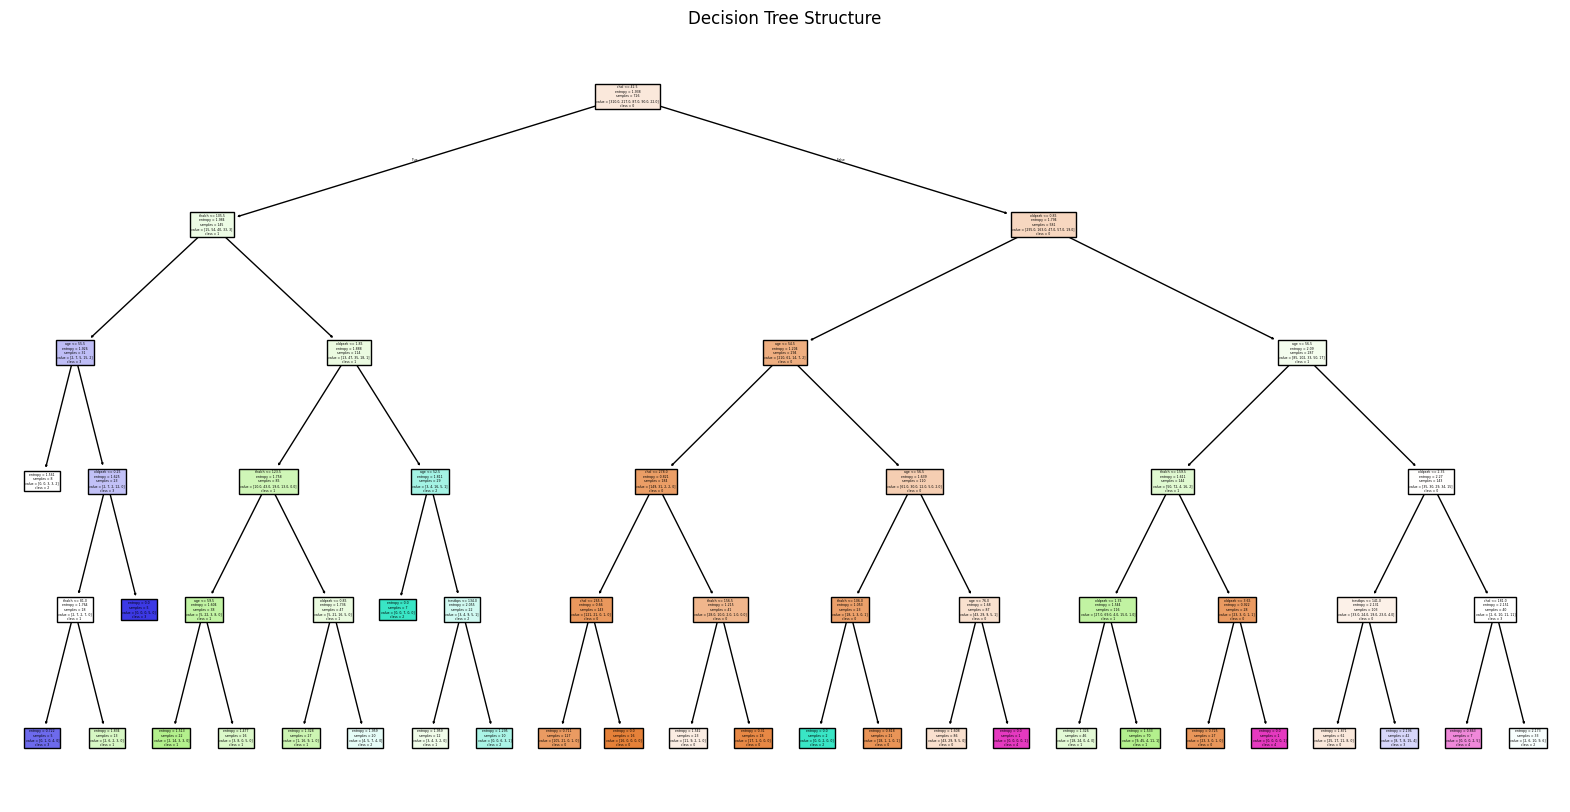

In [159]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=x.columns, class_names=[str(c) for c in best_dt.classes_], filled=True)
plt.title("Decision Tree Structure")
plt.show()